# Simple Perceptron

In [ ]:
import numpy as np

In [ ]:
example_inputs = [1, .2, .1, .05, .2]
example_wights = [.2, .12, .4, .6, .9]

input_vector = np.array(example_inputs)
weights = np.array(example_wights)
bias_wights = .2

activation_level = np.dot(input_vector, weights) + (bias_wights * 1)
print(round(activation_level, 3))

0.674


In [ ]:
threshold = 0.5
if activation_level > threshold:
  perceptron_output = 1
else:
  perceptron_output = 0
print(perceptron_output)

1


In [ ]:
expected_output = 0
new_weights = []
for i, x in enumerate(example_inputs):
  new_weights.append(weights[i] + (expected_output - perceptron_output) * x)

weights = np.array(new_weights)
print(weights)

[-0.8  -0.08  0.3   0.55  0.7 ]


In [ ]:
example_wights

[0.2, 0.12, 0.4, 0.6, 0.9]

# Example: Logical OR

0 0 0

1 0 1

0 1 1

1 1 1

In [ ]:
sample_data = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])
expected_output = np.array([
    [0],
    [1],
    [1],
    [1]
])
activation_threshold = 0.5

In [ ]:
from random import random

weights = np.random.random(2) / 1000 # Small random float 0 < w < .001
weights

array([0.00093263, 0.00035764])

In [ ]:
bias_weight = np.random.random() / 1000
bias_weight

6.109751141392339e-06

In [ ]:
for idx, sample in enumerate(sample_data):
  input_vector = np.array(sample)
  activation_level = np.dot(input_vector, weights) + (bias_weight * 1)
  if activation_level > activation_threshold:
    perceptron_output = 1
  else:
    perceptron_output = 0
  print("Predicted {}".format(perceptron_output))
  print("Expected {}".format(expected_output[idx]))

Predicted 0
Expected [0]
Predicted 0
Expected [1]
Predicted 0
Expected [1]
Predicted 0
Expected [1]


In [ ]:
for iteration_num in range(5):
  correct_answers = 0
  for idx, sample in enumerate(sample_data):
    input_vector = np.array(sample)
    weights = np.array(weights)
    activation_level = np.dot(input_vector, weights) + (bias_weight * 1)
    if activation_level > activation_threshold:
      perceptron_output = 1
    else:
      perceptron_output = 0
    if perceptron_output == expected_output[idx]:
      correct_answers += 1
    new_weights = []
    for i, x in enumerate(sample):
      new_weights.append(weights[i] + (expected_output[idx] - perceptron_output) * x)
    bias_weight = bias_weight + ((expected_output[idx] - perceptron_output) * 1)
    weights = np.array(new_weights)
  print("{} correct answers out of 4, for iteration {}".format(correct_answers, iteration_num))

3 correct answers out of 4, for iteration 0
2 correct answers out of 4, for iteration 1
3 correct answers out of 4, for iteration 2
4 correct answers out of 4, for iteration 3
4 correct answers out of 4, for iteration 4


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

In [ ]:
x_train = np.array([
    [0, 0],
    [1, 0],
    [0, 1],
    [1, 1]
])
y_train = np.array([
    [0],
    [1],
    [1],
    [1]
])

In [ ]:
model = Sequential()
num_neurons = 10
model.add(Dense(num_neurons, input_dim=2))
model.add(Activation("tanh"))
model.add(Dense(1))
model.add(Activation("sigmoid"))
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              11 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

None


Binary - Sigmoid => (0, 1)
Multi Classes - Softmax => table of probability

In [ ]:
print(model.predict(x_train))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
[[0.5       ]
 [0.34307396]
 [0.40030307]
 [0.264729  ]]


In [ ]:
sgd = SGD(learning_rate=0.1)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 709ms/step - accuracy: 0.7500 - loss: 0.5550
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.7500 - loss: 0.5392
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.5255
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7500 - loss: 0.5133
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.5024
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.4925
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7500 - loss: 0.4835
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7500 - loss: 0.4751
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7500 - loss: 0.4674
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7500 - loss: 0.4601
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7500 - loss: 0.4532
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.7500 - l

In [ ]:
model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[0.28177896],
       [0.89233077],
       [0.8821177 ],
       [0.9847989 ]], dtype=float32)

In [ ]:
import h5py
model_structure = model.to_json()
with open("basic_model.json", "w") as json_file:
  json_file.write(model_structure)

model.save_weights("basic_weights.weights.h5")
print("Model Saved")

Model Saved


In [ ]:
import numpy as np

def custom_BCE(y_true, y_pred, epsilon=1e-5):
  # epsilon is used to aviod log(0)
  # y_true: ground truth, (np.array, shape: [N, 1])
  # y_pred: pred result, (np.array, shape: [N, 1])
  # Return: BCE loss value (float)
  y_pred = np.clip(y_pred, epsilon, 1-epsilon)
  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  return loss

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
data = {
    "review": [
        "I love this movie", "The moive is fantastic", "What a waste of time",
        "Absolutely brilliant", "Horrible experience", "Great acting and story",
        "Worst movie ever", "I enjoyed every moment", "Boring plot", "Superb direction"
    ],
    "sentiment": [1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
df

,review,sentiment
0,I love this movie,1
1,The moive is fantastic,1
2,What a waste of time,0
3,Absolutely brilliant,1
4,Horrible experience,0
5,Great acting and story,1
6,Worst movie ever,0
7,I enjoyed every moment,1
8,Boring plot,0
9,Superb direction,1


In [ ]:
vectorizer = TfidfVectorizer(max_features=20)
X = vectorizer.fit_transform(df["review"]).toarray()
y = df["sentiment"].values.reshape(-1, 1)
y.shape

(10, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Fully Connected Neural Network
class SimpleFCNN:
  def __init__(self, input_size):
    # HE initialization
    self.W1 = np.random.randn(input_size, 4) * np.sqrt(2. / input_size)
    self.b1 = np.zeros((1, 4))
    self.W2 = np.random.randn(4, 1) * np.sqrt(2. / input_size)
    self.b2 = np.zeros((1, 1))

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def forward(self, X):
    self.Z1 = np.dot(X, self.W1) + self.b1
    self.A1 = np.maximum(0, self.Z1)   # ReLU
    self.Z2 = np.dot(self.A1, self.W2) + self.b2
    self.A2 = self.sigmoid(self.Z2)
    return self.A2

  def backward(self, X, y, lr=0.01):
    m = X.shape[0]
    # output
    dZ2 = self.A2 - y
    dW2 = np.dot(self.A1.T, dZ2) / m
    db2 = np.sum(dZ2) / m
    # hidden
    dA1 = np.dot(dZ2, self.W2.T)
    dZ1 = dA1 * (self.Z1 > 0) # derivative of ReLU
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    # updating
    self.W2 -= lr * dW2
    self.b2 -= lr * db2
    self.W1 -= lr * dW1
    self.b1 -= lr * db1

  def predict(self, X):
    probs = self.forward(X)
    return (probs > 0.5).astype(int)

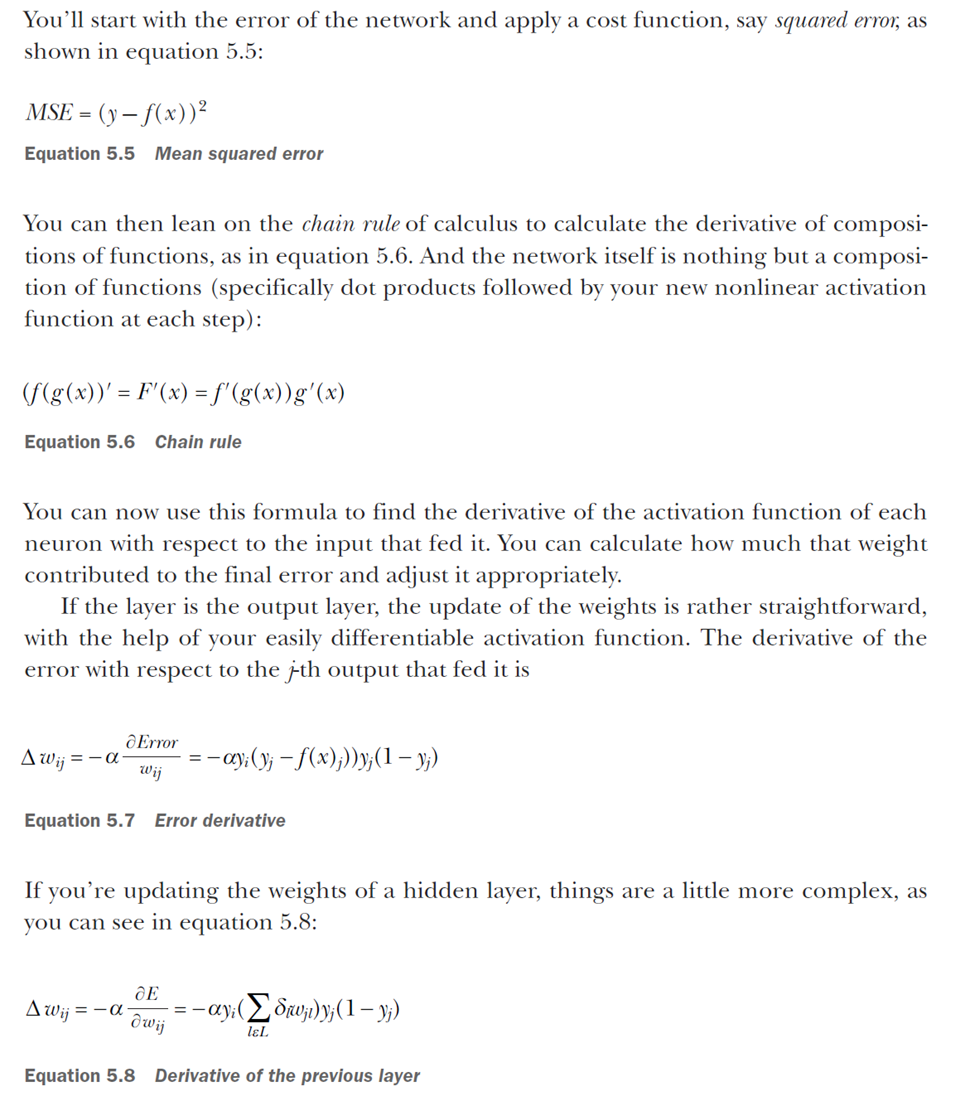

In [ ]:
model = SimpleFCNN(input_size=X_train.shape[1])

In [ ]:
epochs = 2000
for epoch in range(epochs):
  y_pred = model.forward(X_train)
  loss = custom_BCE(y_train, y_pred)
  model.backward(X_train, y_train, lr=0.05)
  if (epoch + 1) % 500 == 0:
    print(f"Epoch: {epoch + 1}, LOSS: {loss:.4f}")

Epoch: 500, LOSS: 0.0935
Epoch: 1000, LOSS: 0.0176
Epoch: 1500, LOSS: 0.0082
Epoch: 2000, LOSS: 0.0050


In [ ]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"test accuracy: {test_accuracy:.2f}")

test accuracy: 0.50


In [ ]:
new_reviews = ["I love the film", "The acting was boring", "The movie was a waste of time"]
X_new = vectorizer.transform(new_reviews).toarray()
predictions = model.predict(X)
for review, pred in zip(new_reviews, predictions):
  sentiment = "pos" if pred[0]==1 else "neg"
  print(f"Comment: '{review}' -> sentiment: {sentiment}")

Comment: 'I love the film' -> sentiment: pos
Comment: 'The acting was boring' -> sentiment: pos
Comment: 'The movie was a waste of time' -> sentiment: neg


# Tensorflow

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
data = {
    "review": [
        "The movie was fantasic and full of surprises!",
        "I hated this movie, it was terrible.",
        "Absolutely loved the performances and the plot.",
        "Worst movie ever, a total waste of time.",
        "It was okay, not great but not bad either."
    ],
    "sentiment": [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

In [ ]:
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df["review"]).toarray()
y = np.array(df["sentiment"]).reshape(-1, 1)

In [ ]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid") # binary classification
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,905 (15.25 KB)

 Trainable params: 3,905 (15.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X, y, epochs=50, batch_size=2, verbose=1)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8375 - loss: 0.6499
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8375 - loss: 0.6327
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.6265
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.5976
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.6012
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.5817
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.5564
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.5496
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.5481
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.5361
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.5142
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 1.0000 - loss: 0.4999
E

In [ ]:
sample = vectorizer.transform(["The movie was a waste of time"]).toarray()
prediction = model.predict(sample)[0][0]
print(f"prediction: {'pos' if prediction > 0.5 else 'neg'} (confidence: {prediction:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
prediction: pos (confidence: 0.53)


# Pytorch

In [ ]:
import numpy as np
import pandas
from sklearn.feature_extraction.text import TfidfVectorizer
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
data = {
    "review": [
        "The movie was fantasic and full of surprises!",
        "I hated this movie, it was terrible.",
        "Absolutely loved the performances and the plot.",
        "Worst movie ever, a total waste of time.",
        "It was okay, not great but not bad either."
    ],
    "sentiment": [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

In [ ]:
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(df["review"]).toarray()
y = np.array(df["sentiment"]).reshape(-1, 1)

In [ ]:
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y).view(-1, 1) # (Batch_size, 1)

In [ ]:
class SentimentNet(nn.Module):
  def __init__(self, input_dim):
    super().__init__()
    self.fc1 = nn.Linear(input_dim, 64)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(64, 32)
    self.relu2 = nn.ReLU()
    self.fc3 = nn.Linear(32, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, X):
    X = self.fc1(X)
    X = self.relu1(X)
    X= self.fc2(X)
    X = self.relu2(X)
    X = self.fc3(X)
    X = self.sigmoid(X)
    return X

In [ ]:
input_dim = X.shape[1]
model = SentimentNet(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 50
batch_size = 2
for epoch in range(epochs):
  permutation = torch.randperm(X_torch.size(0))
  for i in range(0, X_torch.size(0), batch_size):
    indices = permutation[i: i+1]
    batch_x, batch_y = X_torch[indices], y_torch[indices]
    outputs = model(batch_x)
    loss = criterion(outputs, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if (epoch+1) % 10 == 0:
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/50], Loss: 0.7027
Epoch [20/50], Loss: 0.5391
Epoch [30/50], Loss: 0.4043
Epoch [40/50], Loss: 0.2363
Epoch [50/50], Loss: 0.0892


In [ ]:
sample_text = ["The movie was a waste of time"]
sample_vec = vectorizer.transform(sample_text).toarray()
sample_torch = torch.FloatTensor(sample_vec)

In [ ]:
model.eval()
with torch.no_grad():
  prediction = model(sample_torch).item()
  print(f"prediction: {'pos' if prediction > 0.5 else 'neg'} (confidence: {prediction:.2f})")

prediction: pos (confidence: 0.54)
